The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


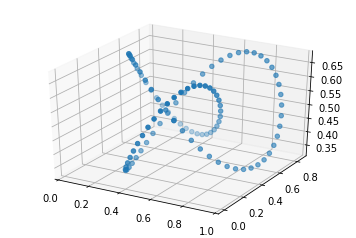

In [83]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import sys
sys.path.append("../")
from unique_hypercube_size import *


%matplotlib inline
%load_ext autoreload
%autoreload 2


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# ax = fig.gca(projection='3d')

T=100
t = np.linspace(0.,2*np.pi, num=T)

g = np.zeros((T,3))
g[:,0] = np.sin(t) + 2.*np.sin(2.*t)
g[:,1] = np.cos(t) - 2.*np.cos(2.*t)
g[:,2] = - np.sin(3.*t) 

g = g/6. + 0.5

# ax.plot(g[:,0], g[:,1], g[:,2] )
ax.scatter(g[:,0], g[:,1], g[:,2] )
plt.show()




done


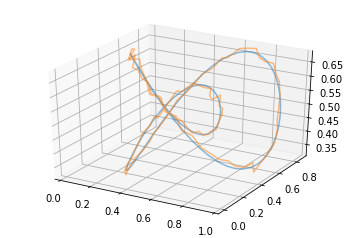

In [93]:
m = 6
k = 3
S = np.sqrt(2)**np.arange(m)

A = create_random_A(m, k, S)

r=1.
n=50**3
"""
First sample is the zero vector
"""


"""
First uniformly sample 
from $k$-dim ball of radius r
"""

A_ = A.reshape((2*m,k))

def phase(X):
    return np.dot(A_,X.T).T%1.

def reconstruct(phi, X, Y):

    phi = phi.reshape((1,-1))

    diff = (Y - phi)%1.



    
    diff = np.amax(np.minimum( diff, 1. - diff), axis=1)
    i = np.argmin(diff)
    return X[i]
    

X = np.random.uniform(size=(n,k))
g_ = np.zeros((T,k))

Y = phase(X) 



for t in range(T):
    g_[t] = reconstruct(phase(g[t]), X,Y)


    
print "done"

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(g[:,0], g[:,1], g[:,2], alpha=0.5)
ax.plot(g_[:,0], g_[:,1], g_[:,2], alpha=0.5)

# ax.scatter(g_[:,0], g_[:,1], g_[:,2])
# ax.scatter(g[:,0], g[:,1], g[:,2] )
plt.show()





# D   = np.random.multivariate_normal(mean=np.zeros(k),cov=np.eye(k), size=n) 
# D   = D/ np.sqrt(np.sum(D**2, axis=1, keepdims=True))
# U   = np.random.uniform(size=(n,1))
# X_r = r*D*(U**(1./k))
# X_ = np.concatenate([X_, X_r], axis=0)

